Здесь используется датасет данных о результатах тестирования крови пациентов с инфекционными заболеваниями различной тяжести.

In [22]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score, roc_curve, log_loss, auc
import scipy.stats as ss
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
df = pd.read_csv('balansed.csv', encoding = 'iso-8859-1')
df.head()

,Patient ID,Patient age quantile,Patient gender,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Platelets.1,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,36cb38a59ce2776,19,1.0,0,1,0,-2.212562,-2.027332,0.826701,0.826701,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,c24489c2c092940,1,1.0,0,0,1,-0.335699,-0.272964,1.869331,1.869331,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0502def18bdfe50,12,0.0,0,1,0,0.534067,0.416252,-0.944515,-0.944515,...,0.481668,-0.147534,-0.370748,-0.140394,-0.416739,-0.436953,0.247995,NaN,NaN,0.902048
3,b24d08efa988dd1,14,0.0,0,0,1,0.923173,1.293436,0.512655,0.512655,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,516736a6c7aec6b,13,0.0,0,1,0,-0.106813,-0.084996,1.442229,1.442229,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
def read_data():
    df = pd.read_csv('balansed.csv').reset_index(drop=True)
    return df


Названия признаков и степеней тяжести заболевания соответственно в списках diseases_name и symptoms_name.
В diseases_name оставлены только признаки, которые не дублируются другими и при этом имеют большое число заполненных записей.

In [61]:
diseases_name = [ 'Patient age quantile', 
       'Patient gender', 
       'Hematocrit', 'Hemoglobin', 'Platelets.1',
       'Red blood Cells',
       'Lymphocytes', 'Leukocytes', 'Basophils',
       'Eosinophils #',
       'Basophils #', 'Monocytes #',
       'Red blood cell distribution width (RDW)',
       'Hb saturation (venous blood gas analysis)',
       'Base excess (venous blood gas analysis)',
       'pO2 (venous blood gas analysis)',
       'pH (venous blood gas analysis)',
       'HCO3 (venous blood gas analysis)',  'Neutrophils', 'Urea', 'Proteina C reativa mg/dL',
       'Creatinine', 'Potassium', 'Sodium']

symptoms_name = ['Patient addmited to regular ward (1=yes, 0=no)',
                 'Patient addmited to semi-intensive unit (1=yes, 0=no)',
                 'Patient addmited to intensive care unit (1=yes, 0=no)']
fraction = 0.80
print('Сейчас датасет содержит данные о {} пациентах и обучается на данных о {} пациентах.'.format(df.shape[0],
                                                                                                   int(fraction*df.shape[0])))
df_1 = df[df['Patient addmited to regular ward (1=yes, 0=no)'] == 1]
df_2 = df[df['Patient addmited to semi-intensive unit (1=yes, 0=no)'] == 1]
df_3 = df[df['Patient addmited to intensive care unit (1=yes, 0=no)'] == 1]
print("Представителей классов:")
print("1:", df_1.shape[0])
print("2:", df_2.shape[0])
print("3:", df_3.shape[0])

Сейчас датасет содержит данные о 135 пациентах и обучается на данных о 108 пациентах.
Представителей классов:
1: 61
2: 48
3: 26


In [62]:
from classifier import OnevsRestClassifier
from logistic_regression import LogisticRegression


params = {}
clf = OnevsRestClassifier(LogisticRegression, params)
X = df[diseases_name].copy()
Y = df[symptoms_name].copy()
_, _ = clf.fit(X, Y)
_, _, test_X, test_Y = clf.impute()
preds = clf.predict_proba(test_X)

Factors for model #0: ['Lymphocytes', 'Monocytes #', 'Hb saturation (venous blood gas analysis)', 'pH (venous blood gas analysis)', 'Proteina C reativa mg/dL']
Factors for model #1: ['Patient age quantile', 'Leukocytes', 'Eosinophils #', 'Monocytes #', 'pO2 (venous blood gas analysis)', 'Sodium']
Factors for model #2: ['Patient age quantile', 'Leukocytes', 'Monocytes #', 'Hb saturation (venous blood gas analysis)', 'Sodium']
Use intercept:  [False, False, False]
Model #1
McFadden's pseudo r^2:  0.6428521819892619
Statistics value: 23.025673241622634
Chi2 distribution critical value: 1.6353828943279067
Model #2
McFadden's pseudo r^2:  0.6249971061604027
Statistics value: 12.792080176083202
Chi2 distribution critical value: 2.167349909298057
Model #3
McFadden's pseudo r^2:  0.39999073971328847
Statistics value: 5.116737303330441
Chi2 distribution critical value: 1.6353828943279067
All coefficients were significant!
Fitted!


In [63]:
clf.classifierModelsInfo()

Model #1
Name                                      |  Coefficient  |  Std. error   |norm_statistic |    p_value    |
Intercept                                 |   0.000000    |   0.376543    |   0.000000    |   1.000000    |
Lymphocytes                               |   0.673591    |   0.330150    |   2.040255    |   0.041325    |
Monocytes #                               |   -1.012749   |   0.379787    |   -2.666623   |   0.007662    |
Hb saturation (venous blood gas analysis) |   -1.878023   |   0.379054    |   -4.954497   |   0.000001    |
pH (venous blood gas analysis)            |   1.011003    |   0.387602    |   2.608349    |   0.009098    |
Proteina C reativa mg/dL                  |   -1.547050   |   0.284498    |   -5.437818   |   0.000000    |
Model #2
Name                                      |  Coefficient  |  Std. error   |norm_statistic |    p_value    |
Intercept                                 |   0.000000    |   0.999145    |   0.000000    |   1.000000    |
Patient ag

In [64]:
clf.ROC_AUC_score(preds, test_Y)

Roc-auc score for model #0: 0.868131868131868
Roc-auc score for model #1: 0.8684210526315789
Roc-auc score for model #2: 0.8818181818181817
Roc-auc score for classifier: 0.882716049382716


Model #1
Roc-auc score: 0.868131868131868


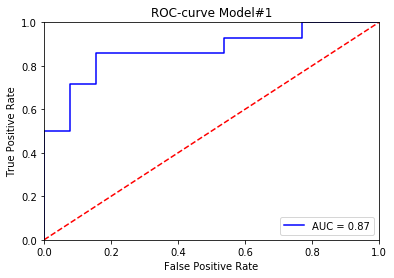

Model #2
Roc-auc score: 0.8684210526315789


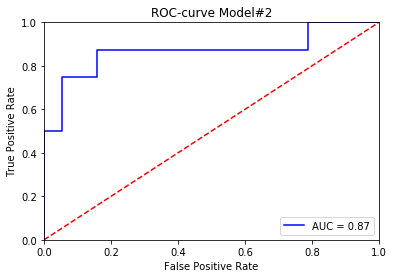

Model #3
Roc-auc score: 0.8818181818181817


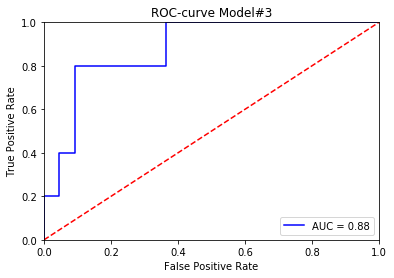

In [66]:
import matplotlib.pyplot as plt

for i in range(3):
    print("Model #{}".format(i + 1))
    print("Roc-auc score:", roc_auc_score(test_Y.values[:, i], preds[:, i], average='micro'))
    fpr, tpr, threshold = roc_curve(test_Y.values[:, i], preds[:, i])
    roc_auc = auc(fpr, tpr)
    plt.title('ROC-curve Model#' + str(i + 1))
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()